In [1]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4 #called `beautifulsoup4`, an html parser

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories


Bad key "text.kerning_factor" on line 4 in
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import importlib
import counting_words as fcns
import data_ingest as ing

In [3]:
importlib.reload(fcns)
importlib.reload(ing)

<module 'data_ingest' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/data_ingest.py'>

In [60]:
data_directory = '../data/'
filename = 'APW_all_attributes_final.csv'

In [97]:
df_race = pd.read_csv(data_directory+'APW_race.csv')
df_race = df_race.loc[:,['race','title']]
df_state = pd.read_csv(data_directory+'APW_state.csv')
df_state = df_state.loc[:,['state','title']]
df_gender = pd.read_csv(data_directory+'APW_gender.csv')
df_gender = df_gender.loc[:,['gender','title']]


In [98]:
df_race = df_race.drop_duplicates(subset='title', keep="first")
df_race.shape

df_state = df_state.drop_duplicates(subset='title', keep="first")
df_state.shape

df_gender = df_gender.drop_duplicates(subset='title', keep="first")
df_gender.shape


(2318, 2)

In [99]:
df_merge = df.merge(df_race,on=['title'],how='left')
df_merge = df_merge.merge(df_state,on=['title'],how='left')
df_merge = df_merge.merge(df_gender,on=['title'],how='left')

In [101]:
df_merge.isnull().sum()

url                      0
title                    0
text                     1
date_written          1185
pages                    0
relation_to_prison       0
race                     4
state                    1
gender                   0
dtype: int64

In [109]:
df = df_merge.copy()

In [110]:
df.to_csv('APW_final.csv', index=False)

In [116]:
data_directory = '../data/'
filename = 'APW_final.csv'
df = ing.load_prep_data(data_directory+filename)
df.head(2)

,url,title,text,date_written,pages,relation_to_prison,race,state,gender
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male


In [52]:
#df_black = df_merge[df_merge['ethnicity']!=df_merge['race']]

In [53]:
#df_race.shape

In [54]:
#black = df_merge[df_merge['race']=="African American"]

In [55]:
#pd.set_option('display.max_rows', None)

In [56]:
#df_merge[df_merge['title']=='A North Carolina ex-felon most valuable election']


In [57]:
#df_merge.sort_values(by='title')

In [58]:
#df_race.head()

In [59]:
#df.head()

In [103]:
# data_directory = '../data/'
# filename = 'APW_all_attributes_final.csv'
# df = ing.load_prep_data(data_directory+filename)
# df.head(2)

In [117]:
df = ing.agg_groups(df, 'race','race_agg',['African American','Latina/o / Hispanic','Multiracial','No information','White (non-Hispanic)'])
df = ing.agg_groups(df, 'gender','gender_agg',['Female','Male','No Information'])

In [118]:
#df.groupby('relation_to_prison').count()

In [119]:
#df.sample(20)

In [120]:
df = ing.norm_text(df)

In [8]:
#df = ing.norm_sent(df)

In [121]:
df.groupby('race_agg').size().reset_index(name="count")

,race_agg,count
0,African American,673
1,Latina/o / Hispanic,144
2,Multiracial,201
3,No information,74
4,Other,145
5,White (non-Hispanic),861


In [122]:
df.groupby('gender_agg').size().reset_index(name="count")

,gender_agg,count
0,Female,95
1,Male,1899
2,Other,104


In [ ]:
df.head(2)

# Basic word counts and word cloud

In [14]:
wordCounts = fcns.wordCounter(df['normalized_text'])

In [15]:
wordCounts.head(10)

,word,count
833,prison,15959
162,time,9107
53,year,7478
904,prisoner,6934
80,life,6625
241,inmate,6449
430,state,6414
149,people,6300
1025,have,6135
296,s,5963


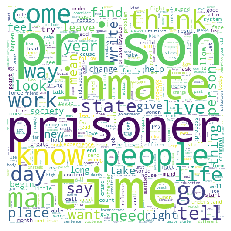

In [16]:
fcns.word_cloud(df['normalized_text'])


# Divergence by race, gender, and states

In [123]:
race_fileids, race_corpora, race_count = fcns.make_group_corpora(df,'race_agg',text_col='normalized_text')
gender_fileids, gender_corpora, gender_count = fcns.make_group_corpora(df,'gender_agg',text_col='normalized_text')
state_fileids, state_corpora, state_count = fcns.make_group_corpora(df,'state',text_col='normalized_text')


['White (non-Hispanic)', 'African American', 'Multiracial', 'Other', 'Latina/o / Hispanic', 'No information']
['Male', 'Other', 'Female']
['California', 'Texas', 'Arizona', 'Pennsylvania', 'New York', 'Missouri', 'Michigan', 'Virginia', 'Massachusetts', 'Florida', 'Indiana', 'Arkansas', 'Illinois', 'North Carolina', 'Georgia', 'Ohio', 'Kentucky', 'Nevada', 'No information', 'Tennessee']


In [124]:
race_count

,race_agg,count
5,White (non-Hispanic),861
0,African American,673
2,Multiracial,201
4,Other,145
1,Latina/o / Hispanic,144
3,No information,74


In [125]:
gender_count

,gender_agg,count
1,Male,1899
2,Other,104
0,Female,95


In [126]:
state_count

,state,count
4,California,393
41,Texas,183
2,Arizona,136
36,Pennsylvania,131
29,New York,116
23,Missouri,82
20,Michigan,82
43,Virginia,64
19,Massachusetts,61
8,Florida,59


## KL Divergence

Divergence Type: KL


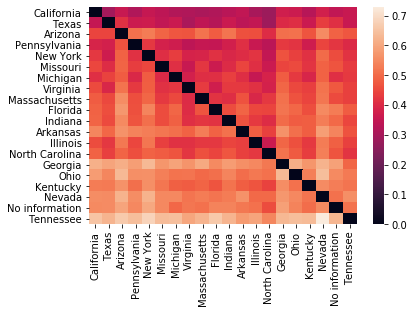

In [127]:
fcns.make_heat_map(state_fileids,state_corpora)

Divergence Type: KL


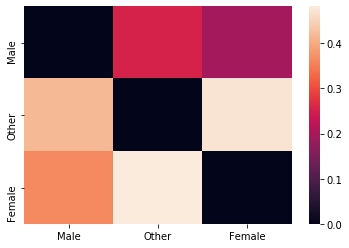

In [128]:
fcns.make_heat_map(gender_fileids,gender_corpora)

Divergence Type: KL


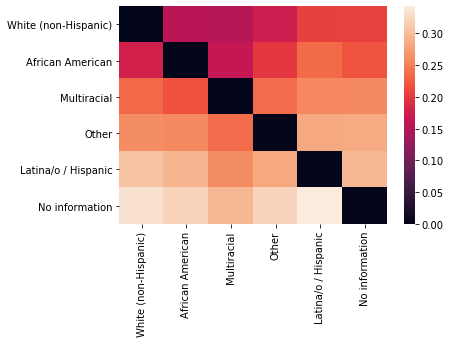

In [129]:
fcns.make_heat_map(race_fileids,race_corpora)

## Wasserstein Divergence

Divergence Type: Wasserstein


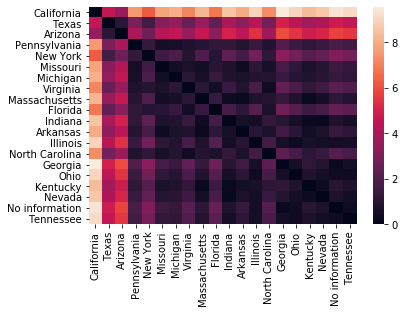

In [130]:
fcns.make_heat_map(state_fileids,state_corpora,divergence_type="Wasserstein")

Divergence Type: Wasserstein


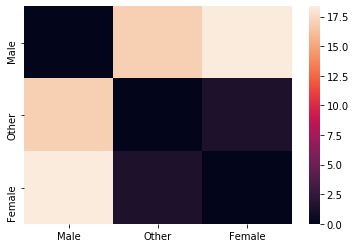

In [131]:
fcns.make_heat_map(gender_fileids,gender_corpora,divergence_type="Wasserstein")

Divergence Type: Wasserstein


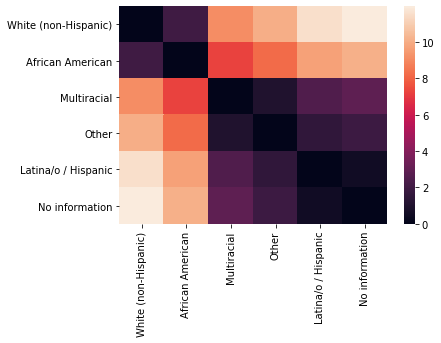

In [132]:
fcns.make_heat_map(race_fileids,race_corpora,divergence_type="Wasserstein")

# KS Divergence

Divergence Type: KS


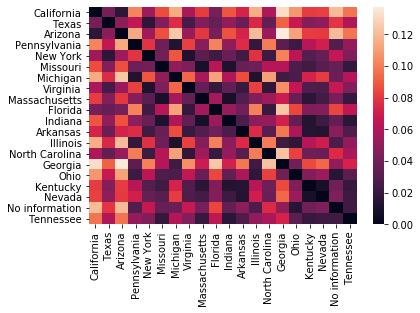

In [133]:
fcns.make_heat_map(state_fileids,state_corpora,divergence_type="KS")


Divergence Type: KS


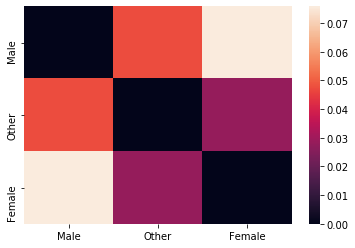

In [134]:
fcns.make_heat_map(gender_fileids,gender_corpora,divergence_type="KS")


Divergence Type: KS


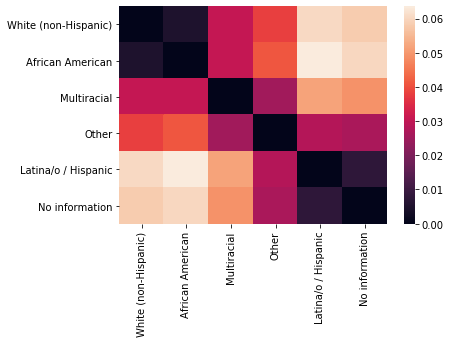

In [135]:
fcns.make_heat_map(race_fileids,race_corpora,divergence_type="KS")

In [136]:
race_fileids

['White (non-Hispanic)',
 'African American',
 'Multiracial',
 'Other',
 'Latina/o / Hispanic',
 'No information']

In [137]:
fcns.Divergence(race_corpora[0],race_corpora[1])

0.15742573448186453

In [138]:
fcns.Divergence(race_corpora[1],race_corpora[0])

0.1783363139253419

### Takeaways

- Definitely appear to be divergences among gender, racial groups and states. 
- However, for KL and Wasserstein divergences, the divergence does seem somewhat correlated with number of essasys falling in that group. That is, groups with a large number of essays appear least divergent from others, whereas groups with a smaller number of essays appear most divergent. This makes sense, given that groups with a larger number of essays probably contain a diverse set of words which make them more similar to other groups. 
- This is less true for KS divergence, except in the case of race
- This is good preliminary suggestive evidence that there are differences among these corpora, but this is just comparing divergences across words. Next we'll do a classification exercise to see if we can actually predict with any accuracy which essays come from which groups


# Classification

In [139]:
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition


In [140]:
df_backup = df.copy()

In [141]:
df.head(2)

,url,title,text,date_written,pages,relation_to_prison,race,state,gender,race_agg,gender_agg,tokenized_text,normalized_text
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal..."
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu..."


## Race

In [142]:
true_cat='African American'
category='race_agg'
keep = ['African American', 'White (non-Hispanic)']

In [143]:
train, test = fcns.prep_classification_data(df,category_col=category,keep=keep,true_cat=true_cat)


/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/counting_words.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = [s == true_cat for s in df[category_col]]


In [144]:
len(train)

1228

In [145]:
len(test)

306

In [146]:
clf_logistic = fcns.classification(train,test,'LogisticRegression')
clf_nb = fcns.classification(train,test,'naiveBayes')
clf_bag = fcns.classification(train,test,'bag')
clf_svm = fcns.classification(train,test,'SVM')
clf_nn = fcns.classification(train,test,'NeuralNet')


LogisticRegression
Training Accuracy:
0.9731270358306189
Testing Accuracy:
0.7810457516339869


naiveBayes
Training Accuracy:
0.8330618892508144
Testing Accuracy:
0.6601307189542484


bag
Training Accuracy:
0.8346905537459284
Testing Accuracy:
0.7222222222222222


SVM
Training Accuracy:
0.996742671009772
Testing Accuracy:
0.8235294117647058


NeuralNet
Training Accuracy:
1.0
Testing Accuracy:
0.8398692810457516




LogisticRegression
Precision:
0.9014084507042254
Recall:
0.5161290322580645
F1 Score:
0.6564102564102563
True Category is: African American


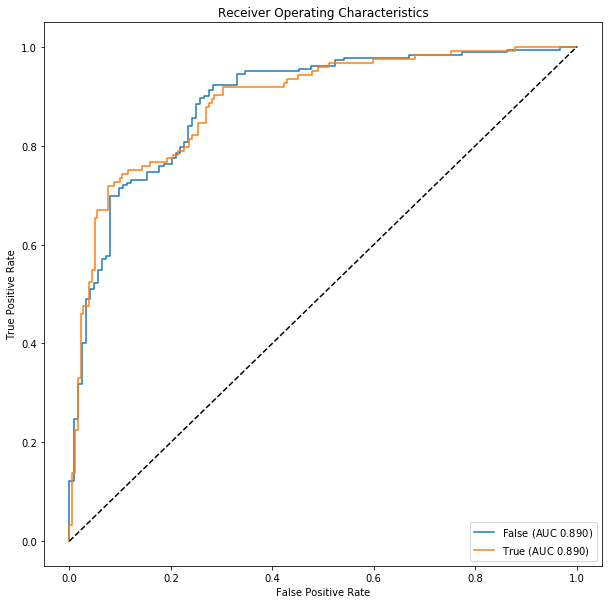

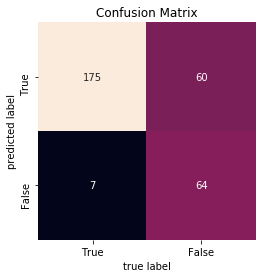

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.218954  0.738834   0.744681           0.738915  0.961538
True        0.218954  0.738834   0.901408           0.661322  0.516129
naiveBayes
Precision:
0.5505050505050505
Recall:
0.8790322580645161
F1 Score:
0.6770186335403726
True Category is: African American


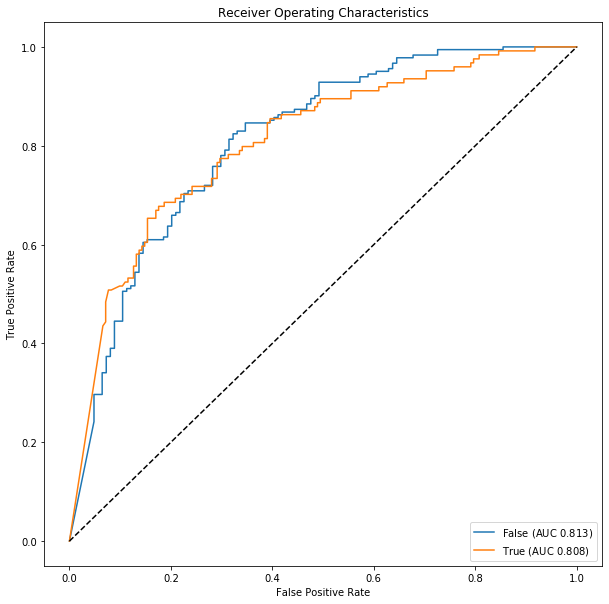

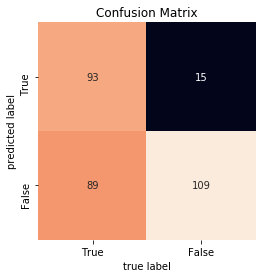

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.339869  0.695011   0.861111           0.730868  0.510989
True        0.339869  0.695011   0.550505           0.532931  0.879032
bag
Precision:
0.8
Recall:
0.41935483870967744
F1 Score:
0.5502645502645502
True Category is: African American


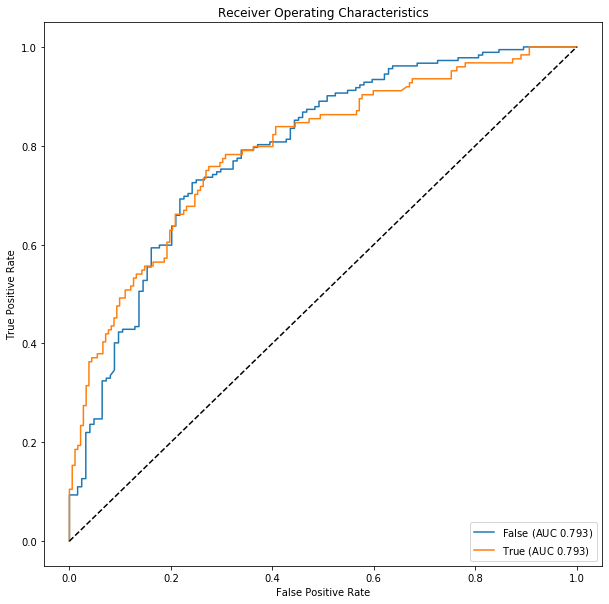

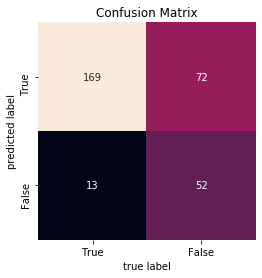

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.277778  0.673963   0.701245           0.693640  0.928571
True        0.277778  0.673963   0.800000           0.570778  0.419355
SVM
Precision:
0.8571428571428571
Recall:
0.6774193548387096
F1 Score:
0.7567567567567567
True Category is: African American
The <class 'sklearn.svm._classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.


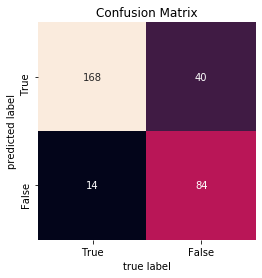

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.176471  0.800248   0.807692           0.791314  0.923077
True        0.176471  0.800248   0.857143           0.711364  0.677419
NeuralNet
Precision:
0.8504672897196262
Recall:
0.7338709677419355
F1 Score:
0.7878787878787878
True Category is: African American


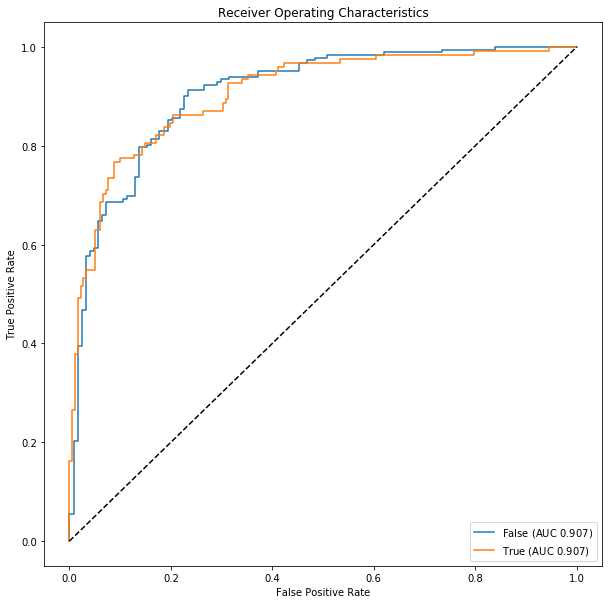

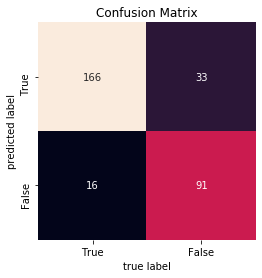

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.160131  0.822979   0.834171           0.813125  0.912088
True        0.160131  0.822979   0.850467           0.731976  0.733871


In [147]:
fcns.evaluation('LogisticRegression',clf_logistic,test,true_cat)

fcns.evaluation('naiveBayes',clf_nb,test,true_cat)

fcns.evaluation('bag',clf_bag,test,true_cat)

fcns.evaluation('SVM',clf_svm,test,true_cat)

fcns.evaluation('NeuralNet',clf_nn,test,true_cat)



# Gender

In [148]:
true_cat='Female'
category='gender_agg'
keep = ['Female', 'Male']


In [149]:
train, test = fcns.prep_classification_data(df,category_col=category,keep=keep,true_cat=true_cat)



/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/counting_words.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = [s == true_cat for s in df[category_col]]


In [150]:
clf_logistic = fcns.classification(train,test,'LogisticRegression')
clf_nb = fcns.classification(train,test,'naiveBayes')
clf_bag = fcns.classification(train,test,'bag')
clf_svm = fcns.classification(train,test,'SVM')
clf_nn = fcns.classification(train,test,'NeuralNet')


LogisticRegression
Training Accuracy:
0.9523809523809523
Testing Accuracy:
0.9522613065326633


naiveBayes
Training Accuracy:
0.9135338345864662
Testing Accuracy:
0.9271356783919598


bag
Training Accuracy:
0.9680451127819549
Testing Accuracy:
0.9547738693467337


SVM
Training Accuracy:
0.9862155388471178
Testing Accuracy:
0.9522613065326633


NeuralNet
Training Accuracy:
1.0
Testing Accuracy:
0.9547738693467337




LogisticRegression
Precision:
0.0
Recall:
0.0
F1 Score:
0.0
True Category is: Female


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


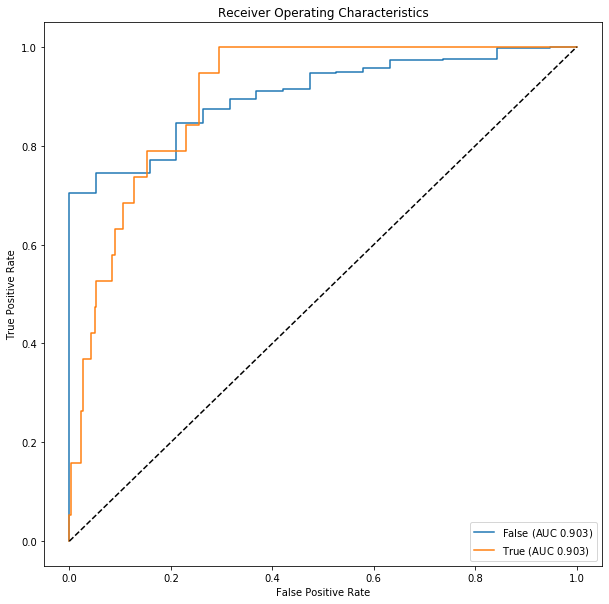

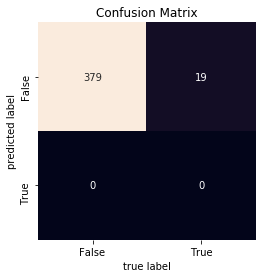

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False       0.047739  0.5   0.952261           0.952261     1.0
True        0.047739  0.5   0.000000           0.047739     0.0
naiveBayes
Precision:
0.08333333333333333
Recall:
0.05263157894736842
F1 Score:
0.06451612903225808
True Category is: Female


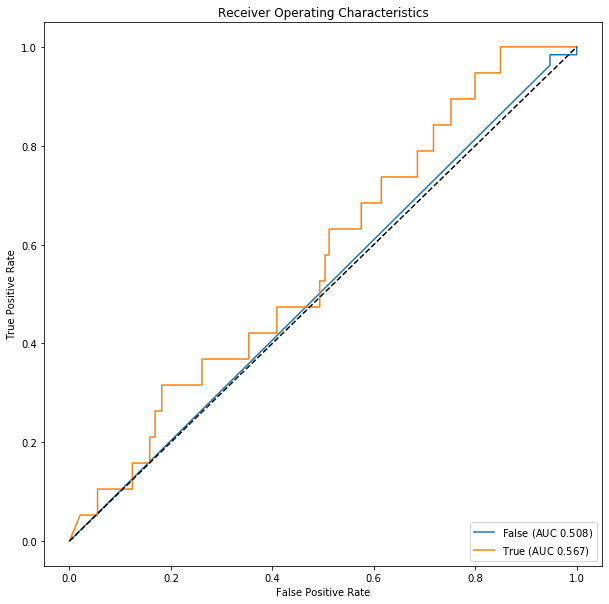

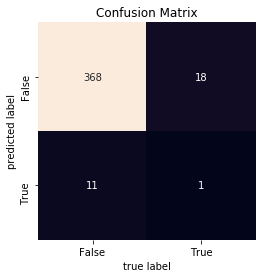

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.072864  0.511804   0.953368           0.953336  0.970976
True        0.072864  0.511804   0.083333           0.049612  0.052632
bag
Precision:
1.0
Recall:
0.05263157894736842
F1 Score:
0.1
True Category is: Female


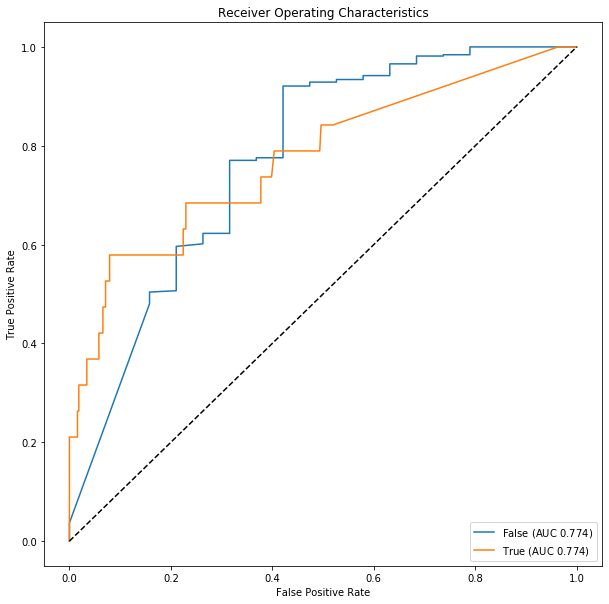

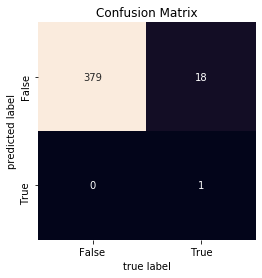

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.045226  0.526316    0.95466           0.954660  1.000000
True        0.045226  0.526316    1.00000           0.097858  0.052632
SVM
Precision:
0.0
Recall:
0.0
F1 Score:
0.0
True Category is: Female
The <class 'sklearn.svm._classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


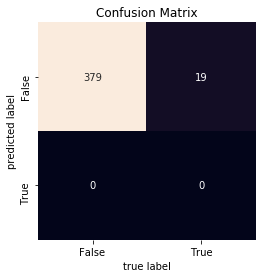

/Users/daminisharma/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
False       0.047739  0.5   0.952261           0.952261     1.0
True        0.047739  0.5   0.000000           0.047739     0.0
NeuralNet
Precision:
1.0
Recall:
0.05263157894736842
F1 Score:
0.1
True Category is: Female


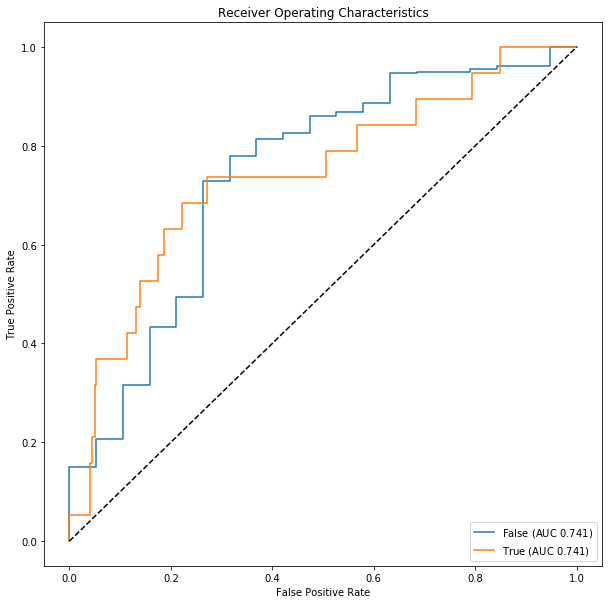

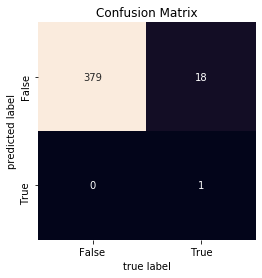

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.045226  0.526316    0.95466           0.954660  1.000000
True        0.045226  0.526316    1.00000           0.097858  0.052632


In [151]:
fcns.evaluation('LogisticRegression',clf_logistic,test,true_cat)

fcns.evaluation('naiveBayes',clf_nb,test,true_cat)

fcns.evaluation('bag',clf_bag,test,true_cat)

fcns.evaluation('SVM',clf_svm,test,true_cat)

fcns.evaluation('NeuralNet',clf_nn,test,true_cat)



# States

In [152]:
true_cat='California'
category='state'
keep = list(df['state'].unique())

In [153]:
train, test = fcns.prep_classification_data(df,category_col=category,keep=keep,true_cat=true_cat)



In [154]:
clf_logistic = fcns.classification(train,test,'LogisticRegression')
clf_nb = fcns.classification(train,test,'naiveBayes')
clf_bag = fcns.classification(train,test,'bag')
clf_svm = fcns.classification(train,test,'SVM')
clf_nn = fcns.classification(train,test,'NeuralNet')


LogisticRegression
Training Accuracy:
0.8427635497319833
Testing Accuracy:
0.8281622911694511


naiveBayes
Training Accuracy:
0.8624181060154854
Testing Accuracy:
0.7947494033412887


bag
Training Accuracy:
0.9148302561048243
Testing Accuracy:
0.9164677804295943


SVM
Training Accuracy:
0.9934484812388327
Testing Accuracy:
0.8902147971360382


NeuralNet
Training Accuracy:
1.0
Testing Accuracy:
0.8687350835322196




LogisticRegression
Precision:
1.0
Recall:
0.07692307692307693
F1 Score:
0.14285714285714288
True Category is: California


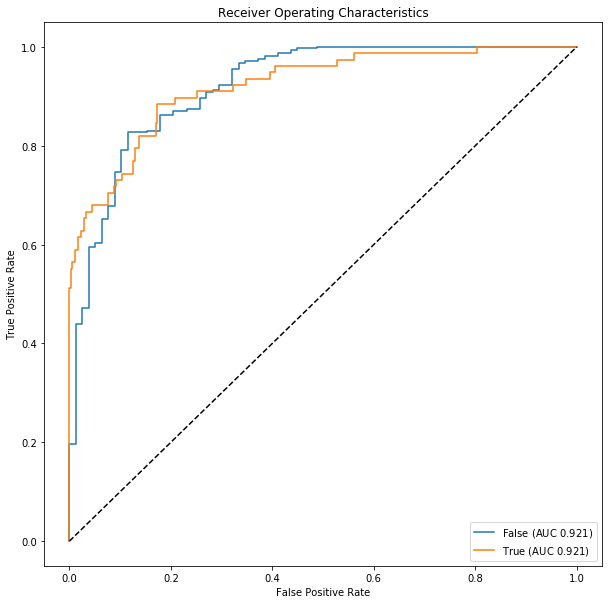

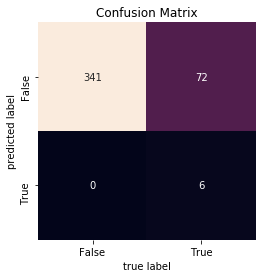

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.171838  0.538462   0.825666           0.825666  1.000000
True        0.171838  0.538462   1.000000           0.248761  0.076923
naiveBayes
Precision:
0.4230769230769231
Recall:
0.28205128205128205
F1 Score:
0.3384615384615385
True Category is: California


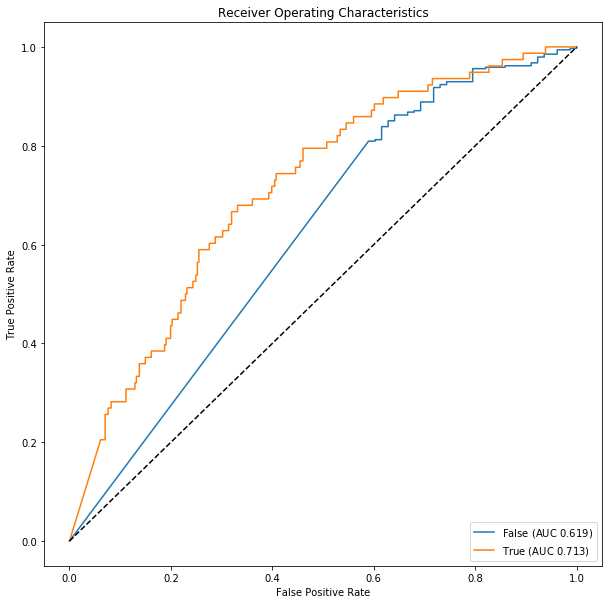

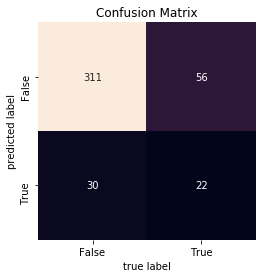

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.205251  0.597037   0.847411           0.844458  0.912023
True        0.205251  0.597037   0.423077           0.252981  0.282051
bag
Precision:
0.9215686274509803
Recall:
0.6025641025641025
F1 Score:
0.7286821705426356
True Category is: California


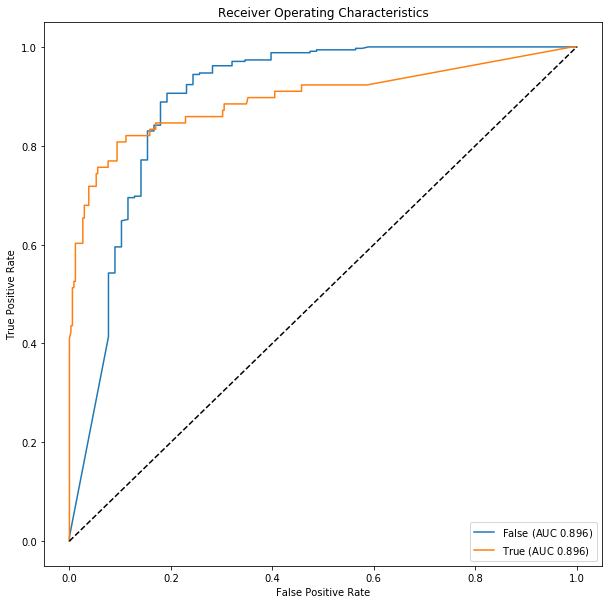

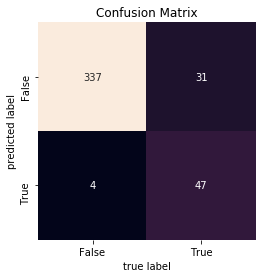

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.083532  0.795417   0.915761           0.914565  0.988270
True        0.083532  0.795417   0.921569           0.629290  0.602564
SVM
Precision:
1.0
Recall:
0.41025641025641024
F1 Score:
0.5818181818181819
True Category is: California
The <class 'sklearn.svm._classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.


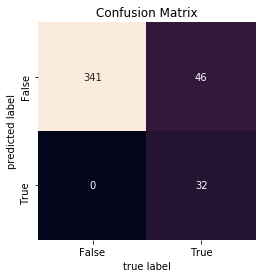

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.109785  0.705128   0.881137           0.881137  1.000000
True        0.109785  0.705128   1.000000           0.520042  0.410256
NeuralNet
Precision:
1.0
Recall:
0.2948717948717949
F1 Score:
0.45544554455445546
True Category is: California


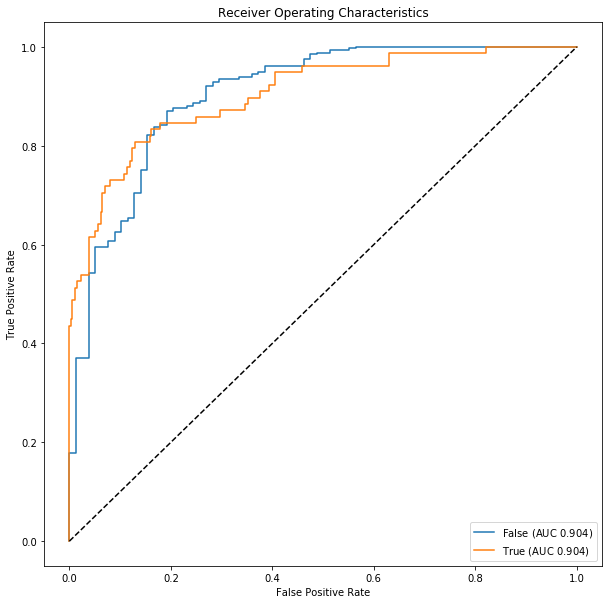

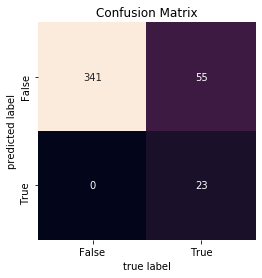

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
False       0.131265  0.647436   0.861111           0.861111  1.000000
True        0.131265  0.647436   1.000000           0.426137  0.294872


In [155]:
fcns.evaluation('LogisticRegression',clf_logistic,test,true_cat)

fcns.evaluation('naiveBayes',clf_nb,test,true_cat)

fcns.evaluation('bag',clf_bag,test,true_cat)

fcns.evaluation('SVM',clf_svm,test,true_cat)

fcns.evaluation('NeuralNet',clf_nn,test,true_cat)



# Topic Modeling

In [269]:
# generate category column
#df['category'] = df['race_agg']

In [252]:
# binary race
#df = df[df['category'].isin(['African American', 'White (non-Hispanic)'])]

In [353]:
#df.groupby('category').count()

In [354]:
# holdBackFraction = .2
# train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)



In [355]:
# print(len(train_data_df))
# print(len(test_data_df))

In [256]:
##TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
#TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [257]:
#train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [356]:
#Create vectors
#TFVects_test = TFVectorizer.transform(test_data_df['text'])
#test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]



# Logistic Regression

In [357]:
# logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
# logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
# print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

In [359]:
#print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))


In [360]:
#lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

In [361]:
#type(lucem_illud_2020.metrics.evaluateClassifier(logistic_l1, test_data_df))


In [362]:
#lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

# Multinomial

In [403]:
#df = df_backup

In [363]:
#df.head(2)

In [280]:
# # generate category column
# df['category'] = df['race_agg']

In [281]:
# holdBackFraction = .2
# train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)

# TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
# TFVects = TFVectorizer.fit_transform(train_data_df['text'])

# train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

# #Create vectors
# TFVects_test = TFVectorizer.transform(test_data_df['text'])
# test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]



In [364]:
# MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
# MultinomialNB_ng.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])



In [365]:
# train_data_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_data_df['vect'], axis=0))
# print("Training score:")
# print(MultinomialNB_ng.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))



In [366]:
# #Add to df
# test_data_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_data_df['vect'], axis=0))

# #Test
# print("Testing score:")
# print(MultinomialNB_ng.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))



In [395]:
#lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_data_df)



In [394]:
#lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_data_df)



In [393]:
#lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_data_df)

# Naive Bayes

In [392]:
# binary race
#df = df[df['category'].isin(['African American', 'White (non-Hispanic)'])]

In [391]:
#df['category'] = [s == 'African American' for s in df['race_agg']]

In [301]:
#df.head()

In [390]:
# holdBackFraction = .2
# train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df, holdBackFraction=holdBackFraction)

# TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
# TFVects = TFVectorizer.fit_transform(train_data_df['text'])

# train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

# #Create vectors
# TFVects_test = TFVectorizer.transform(test_data_df['text'])
# test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]



In [389]:
#clf = sklearn.naive_bayes.GaussianNB()

In [388]:
#clf.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

In [387]:
#lucem_illud_2020.evaluateClassifier(clf, test_data_df)

In [386]:
#lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)

In [385]:
# naiveBayes = sklearn.naive_bayes.BernoulliNB()
# naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

In [384]:
# print("Training:")
# print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
# print("Testing:")
# print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

In [383]:
# test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
# test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [382]:
#sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

In [381]:
#sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

In [380]:
#sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

In [379]:
# #Top indices
# trueVals, falseVals = naiveBayes.feature_log_prob_

# words_dict = {
#     'African American' : [],
#     'AA_log_prob' : [],
#     'White' : [],
#     'White_log_prob' : [],
# }

# for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:20]:
#     words_dict['African American'].append(TFVectorizer.get_feature_names()[i])
#     words_dict['AA_log_prob'].append(prob)

# for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:20]:
#     words_dict['White'].append(TFVectorizer.get_feature_names()[i])
#     words_dict['White_log_prob'].append(prob)
    
# pd.DataFrame(words_dict)

# Decision trees

In [377]:
# tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

# bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data


In [378]:
# bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier



In [316]:
#lucem_illud_2020.plotregions(bag, test_data_df)

In [376]:
#lucem_illud_2020.evaluateClassifier(bag, test_data_df)

In [375]:
#lucem_illud_2020.plotConfusionMatrix(bag, test_data_df)

# SVM

In [374]:
# clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
# #probability = True is slower but  lets you call predict_proba()
# clf_svm.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])



In [373]:
#lucem_illud_2020.evaluateClassifier(clf_svm, test_data_df)

In [372]:
#lucem_illud_2020.plotConfusionMatrix(clf_svm, test_data_df)

In [ ]:
#lucem_illud_2020.plotregions(clf_svm, test_data_df)

# Neural Net

In [371]:
#clf_nn = sklearn.neural_network.MLPClassifier()
#clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])


In [370]:
#type(lucem_illud_2020.evaluateClassifier(clf_nn, test_data_df))

In [369]:
#lucem_illud_2020.plotConfusionMatrix(clf_nn, test_data_df)


In [368]:
#lucem_illud_2020.plotMultiROC(bag, test_data_df)


In [367]:
# print("Training:")
# print(clf_nn.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
# print("Testing:")
# print(clf_nn.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))